# Безградиентные методы оптимизации

## Особенность задач

- Целевая переменная – дискретная
- Градиент вычислить сложно и долго

## Примеры

- Все задачи про принятие решений и выбор элемента из конечного множества
- Подбор гиперпараметров в моделях машинного обучения
- Параметры скаляризации для задач многокритериальной оптимизации

## Методы для дискретных задач

- Метод имитации отжига (simulated annealing)
- Генетический алгоритм (genetic algorithms)
- Алгоритм роя частиц  (particle swarm optimization)

### Метод имитации отжига

- Аналогия процедуры в металлургии, при которой происходит кристаллизация вещества при постепенном понижении температуры
- Основные шаги алгоритма
    - Инициализация начальной точки и параметров
    - На каждой итерации происходит обновление параметров с некоторой вероятностью, которая зависит от температуры
    $$ P(x_k \to x^*) = \begin{cases} 1 & f(x^*) < f(x_k) \\ \exp\left(- \frac{f(x^*) - f(x_k)}{T / k}\right) & f(x^*) > f(x_k) \end{cases} $$
    - Подбор знаменателя – эвристика

**Q:** чему соответствует метод при нулевой температуре?

In [244]:
import numpy as np

def sim_anneal(f, x0, T0, num_iter, alpha):
    x = x0
    conv = [x]
    n = x.shape[0]
    cur_f = f(x)
    f_best = cur_f
    x_best = x.copy()
    T = T0
    for i in range(num_iter):
        idx = np.random.randint(0, n)
        x_new = x.copy()
        x_new[idx] = -x_new[idx]
        f_new = f(x_new)
        if f_new < cur_f:
            x = x_new.copy()
            cur_f = f_new
            conv.append(x)
        if f_new > cur_f:
#             print(np.exp( - (f_new - cur_f) / (T / (i+1))))
            if np.exp( - (f_new - cur_f) / T) >= np.random.rand(1):
                x = x_new.copy()
                cur_f = f_new
                conv.append(x)
        if f_new < f_best:
            f_best = f_new
            x_best = x.copy()
#         print(f(x))
        T = alpha * T
    return x_best, f_best, conv    

In [245]:
n = 100
W = np.random.rand(n, n)
W = W + W.T

In [246]:
def f(x):
    return x @ W @ x

In [247]:
x0 = np.ones(n)
num_iter = 500
T = 1000
alpha = 0.5

In [249]:
x_best, f_best, conv = sim_anneal(f, x0, T, num_iter, alpha)
print(f_best)
print(np.sum(x_best == 1), np.sum(x_best == -1))

-436.9220245305714
49 51


(array([-2000.,     0.,  2000.,  4000.,  6000.,  8000., 10000., 12000.]),
 <a list of 8 Text yticklabel objects>)

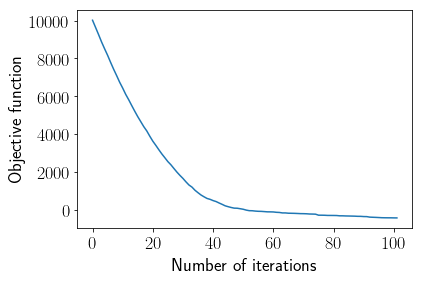

In [250]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rc("text", usetex=True)

plt.plot([f(x) for x in conv])
plt.xlabel("Number of iterations", fontsize=18)
plt.ylabel("Objective function", fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

### Выводы по имитации отжига

- Очень простой метод
- Можно применить для большого количества задач
    - Процедура обновления точки
    - Копирование состояний
    - Стратегии уменьшения температуры
    - Баланс между числом итераций и начальной температурой

### Генетический алгоритм

- Аналог эволюционных изменений
- Основные этапы
    - Инициализация множества кандидатов
    - Вычисление для этих кандидатов значения целевой функции
    - Отбираем $k$ лучших кандидатов в решения
    - Делаем из них новое множество кандидатов с помощью 
        - мутаций
        - кроссовера

### Кроссовер

<img src="./crossover.png" width=500>

### Мутация

- Случайное изменение случайного элемента в тестовом векторе
- Возможные варианты
    - $0 \to 1$ и наоборот
    - добавить случайный шум
    - всё что придумаете, чтоюы расширить пространство поиска

### [Nevergrad](https://github.com/facebookresearch/nevergrad)

- Библиотека от Facebook для безградиентных методов
- В этой библиотеке есть мнолжество алгоритмов для дискретных задач
- Например реализован [Compact Genetic Algorithm](https://pdfs.semanticscholar.org/4b0b/5733894ffc0b2968ddaab15d61751b87847a.pdf)


In [254]:
import nevergrad as ng
print(list(sorted(ng.optimizers.registry.keys())))

['ASCMA2PDEthird', 'ASCMADEQRthird', 'ASCMADEthird', 'AlmostRotationInvariantDE', 'AlmostRotationInvariantDEAndBigPop', 'AvgCauchyLHSSearch', 'AvgCauchyScrHammersleySearch', 'AvgHaltonSearch', 'AvgHaltonSearchPlusMiddlePoint', 'AvgHammersleySearch', 'AvgHammersleySearchPlusMiddlePoint', 'AvgLHSSearch', 'AvgLargeHaltonSearch', 'AvgLargeHaltonSearchPlusMiddlePoint', 'AvgLargeHammersleySearch', 'AvgLargeHammersleySearchPlusMiddlePoint', 'AvgLargeScrHaltonSearch', 'AvgLargeScrHaltonSearchPlusMiddlePoint', 'AvgLargeScrHammersleySearch', 'AvgLargeScrHammersleySearchPlusMiddlePoint', 'AvgRescaleScrHammersleySearch', 'AvgScrHaltonSearch', 'AvgScrHaltonSearchPlusMiddlePoint', 'AvgScrHammersleySearch', 'AvgScrHammersleySearchPlusMiddlePoint', 'AvgSmallHaltonSearchPlusMiddlePoint', 'AvgSmallHammersleySearchPlusMiddlePoint', 'AvgSmallScrHaltonSearchPlusMiddlePoint', 'AvgSmallScrHammersleySearchPlusMiddlePoint', 'BO', 'BPRotationInvariantDE', 'CM', 'CMA', 'CMandAS', 'CMandAS2', 'CauchyLHSSearch', '

In [280]:
conv_cga = []
def obj(*x):
    y = np.array(x).squeeze()
    conv_cga.append(y)
#     print(y.shape)
    return y @ (W @ y)

In [281]:
var = [ng.var.OrderedDiscrete([-1, 1]) for i in range(n)]
inst = ng.Instrumentation(*var)
opt = ng.optimizers.cGA(inst, budget=500)
x_sol = opt.minimize(obj)
print(x_sol)

Candidate(args=(-1, -1, 1, 1, -1, 1, -1, -1, 1, 1, -1, 1, -1, -1, -1, 1, 1, 1, 1, 1, 1, -1, -1, 1, -1, 1, 1, -1, -1, -1, 1, -1, 1, 1, 1, -1, 1, -1, 1, 1, -1, 1, -1, -1, 1, 1, 1, 1, -1, 1, -1, -1, -1, -1, -1, 1, -1, 1, 1, -1, 1, 1, -1, -1, -1, -1, -1, -1, 1, -1, 1, -1, -1, 1, -1, 1, -1, -1, 1, -1, -1, 1, 1, -1, 1, -1, -1, 1, 1, 1, 1, -1, 1, 1, -1, 1, -1, -1, -1, 1), kwargs={})


In [282]:
x_sol_ar = np.array(x_sol.args)
print(f(x_sol_ar))

-124.96012225129437


-124.9601222512944


Text(0.5, 0, 'Number of iterations')

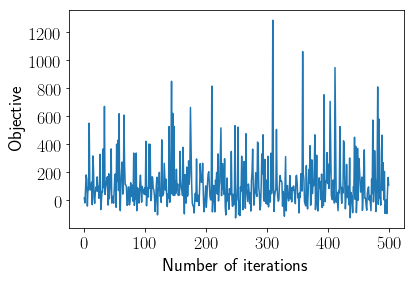

In [290]:
def obj_plot(x):
    return x @ (W @ x)

f_conv = [obj_plot(x) for x in conv_cga]
print(np.min(np.array(f_conv)))
plt.plot(f_conv)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.ylabel("Objective", fontsize=18)
plt.xlabel("Number of iterations", fontsize=18)

### Выводы

- Собрать генетический алгоритм, который хорошо решаеют конкретную задачу – это искусство!
- Множество стратегий выбора парамеров кроссовера и мутации
- Полезной и практически важной теории скорее нет
- Есть стандартные реализации в MATLAB, например

### Методы роя частиц

<img src="./pso.gif">

<img src="./pso_alg.png">

### Метод Нелдера-Мида (John Nelder and Roger Mead (1965))

**Основная идея**: последовательное изменение симплекса 

на множестве определения функции в сторону области 

увеличения значений функции

**Вопрос**: что такое симплекс и сколько точек надо чтобы его задать?


### Псевдокод

```python
def NelderMeed(f, x0, maxiter, alpha=1., gamma=2., beta=0.5, delta=0.5):
    
    s = InitializeSimplex(x0)
    
    for i in range(maxiter):
        
        # sorted_s stored vertices of the simplex 
        
        # from the lowest value of f to the highest one
        
        sorted_s = OrderCurrentPoint(s, f)
        
        centroid = np.mean(sorted_s[1:])
        
        # Now we start transfomation of the current simplex
        
        # Reflection w.r.t. centroid from the worst point 
        
        x_r = centroid + alpha * (centroid - sorted_s[0])
        
        if f(sorted_s[1]) < f(x_r) and f(x_r) <= f(sorted_s[-1]):
            
            sorted_s[0], sorted_s[1] = sorted_s[1], x_r
            
            s = sorted_s
            
            continue
        
        elif f(x_r) > f(sorted_s[-1]):
            
            # Expansion
            
            x_e = centroid + gamma * (x_r - centroid)
            
            if f(x_e) > f(x_r):
                    
               sorted_s[0] = x_e
            
            else:
               
               sorted_s[0] = x_r
                  
            s = sorted_s
        
        elif f(sorted_s[1]) > f(x_r):
            
            # Contraction
            
            x_c = centroid + beta * (sorted_s[0] - centroid)
                            
            if f(x_c) > f(sorted_s[0]):
                
                sorted_s[0] = x_c
                
                continue
            
            else:
                
                # Shrink contraction
                                    
                sorted_s = ShrinkCurrentSimplex(sorted_s, delta)
                                    
            s = sorted_s
        
        x = np.mean(s)

    return x
```

### Особенности работы метода

- Изменения симплекса регулируются эвристическими параметрами
- Набор модификаций симплекса можно изменять
- Критерии остановки
    - Число итераций
    - Незначительность изменения симплекса
    - Малость пространства, которое покрывает симплекс
- Инициализация может существенно влиять на сходимость


### Визуализация работы метода Нелдера-Мида

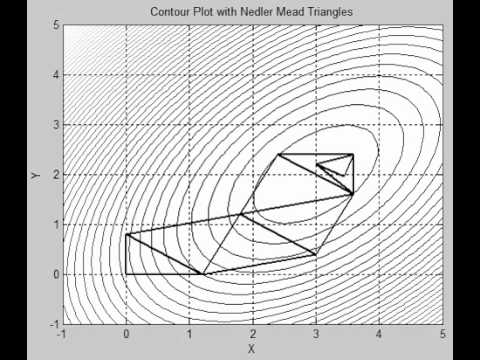

In [1]:
from IPython.lib.display import YouTubeVideo
YouTubeVideo('HUqLxHfxWqU')

### Пример работы метода 

In [292]:
import scipy.optimize as spopt
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

n = 2
x0 = np.random.randn(n)
x = spopt.fmin(spopt.rosen, x0, maxiter=10000)
print(x)
print(np.linalg.norm(spopt.rosen_der(x)))

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 47
         Function evaluations: 89
[0.99999206 0.99998512]
0.0004615918658380251


## Байесовская оптимизация

- Можно вычислить несколько значений функции
- По ним приблизить вид функции на основе гауссовских процессов
- Найти минимум этой аппроксимации
- Есть статистические гарантии для найденного минимума

### Основная идея гауссовских процессов

- Частный случай случайного процесса
- Задаёт вероятностное распределение на функциях
- Гауссовские процессы хороши тем, что имеют удобную параметризацию. Угадайте какую :)

In [1]:
from bayes_opt import BayesianOptimization
from bayes_opt import UtilityFunction
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def target(x):
    return np.exp(-(x - 2)**2) + np.exp(-(x - 6)**2/10) + 1/ (x**2 + 1)

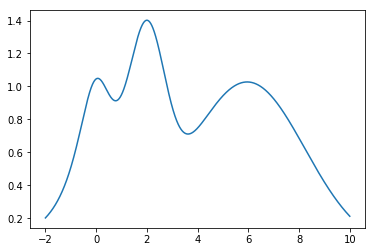

In [2]:
x = np.linspace(-2, 10, 10000).reshape(-1, 1)
y = target(x)

plt.plot(x, y);

In [3]:
optimizer = BayesianOptimization(target, {'x': (-2, 10)}, random_state=27)

In [4]:
optimizer.maximize(init_points=2, n_iter=0, kappa=5)

|   iter    |  target   |     x     |
-------------------------------------
|  1        |  0.8198   |  3.109    |
|  2        |  0.746    |  7.775    |


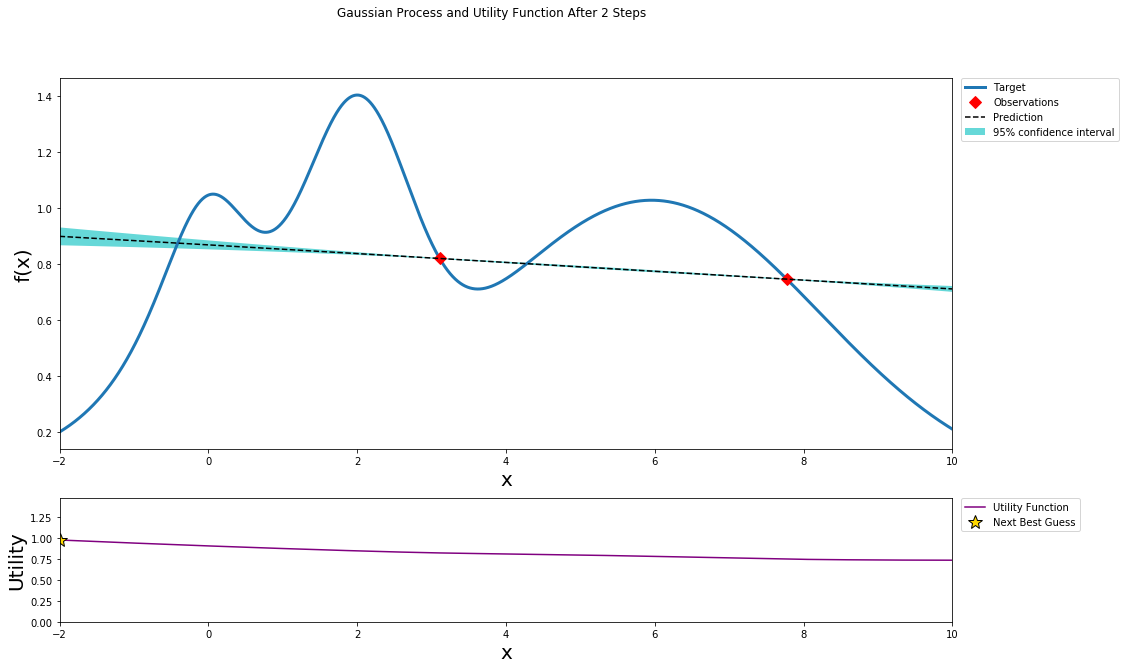

In [5]:
import utils

utils.plot_gp(optimizer, x, y)

|   iter    |  target   |     x     |
-------------------------------------
|  3        |  0.2017   | -2.0      |


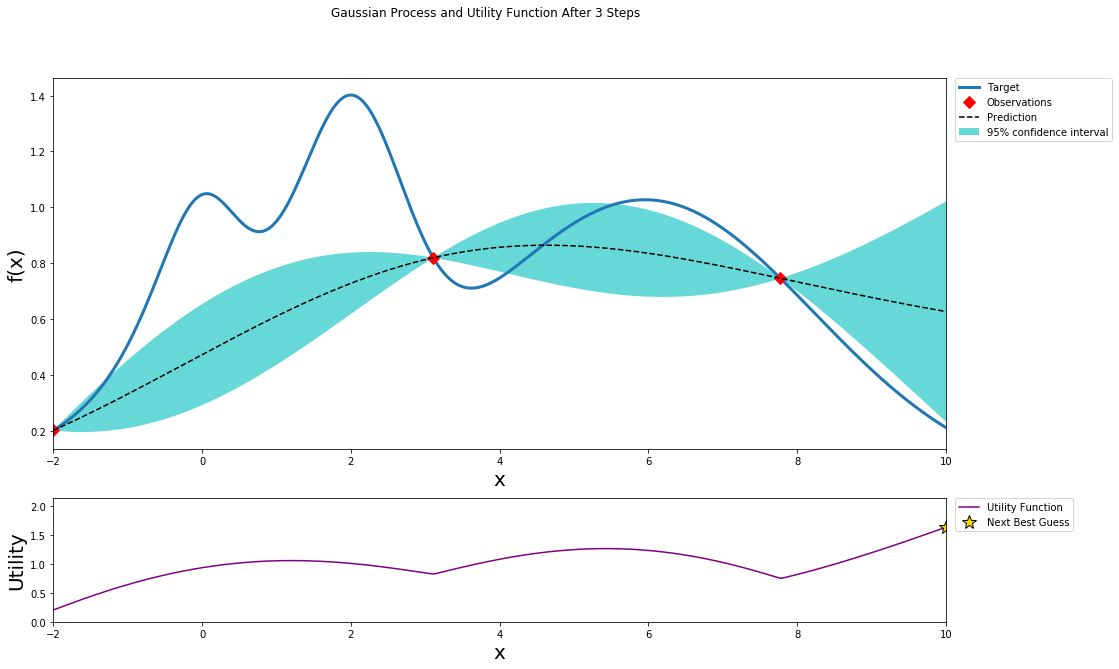

In [6]:
optimizer.maximize(init_points=0, n_iter=1, kappa=5)
utils.plot_gp(optimizer, x, y)

|   iter    |  target   |     x     |
-------------------------------------
|  4        |  0.2118   |  10.0     |


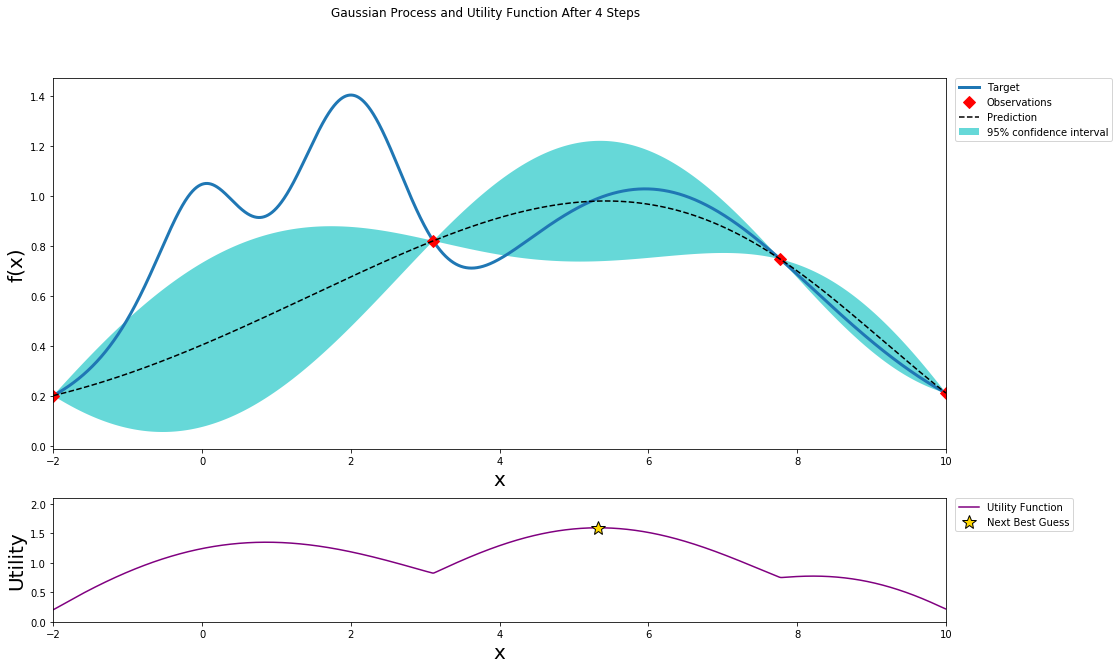

In [7]:
optimizer.maximize(init_points=0, n_iter=1, kappa=5)
utils.plot_gp(optimizer, x, y)

|   iter    |  target   |     x     |
-------------------------------------
|  5        |  0.9898   |  5.327    |


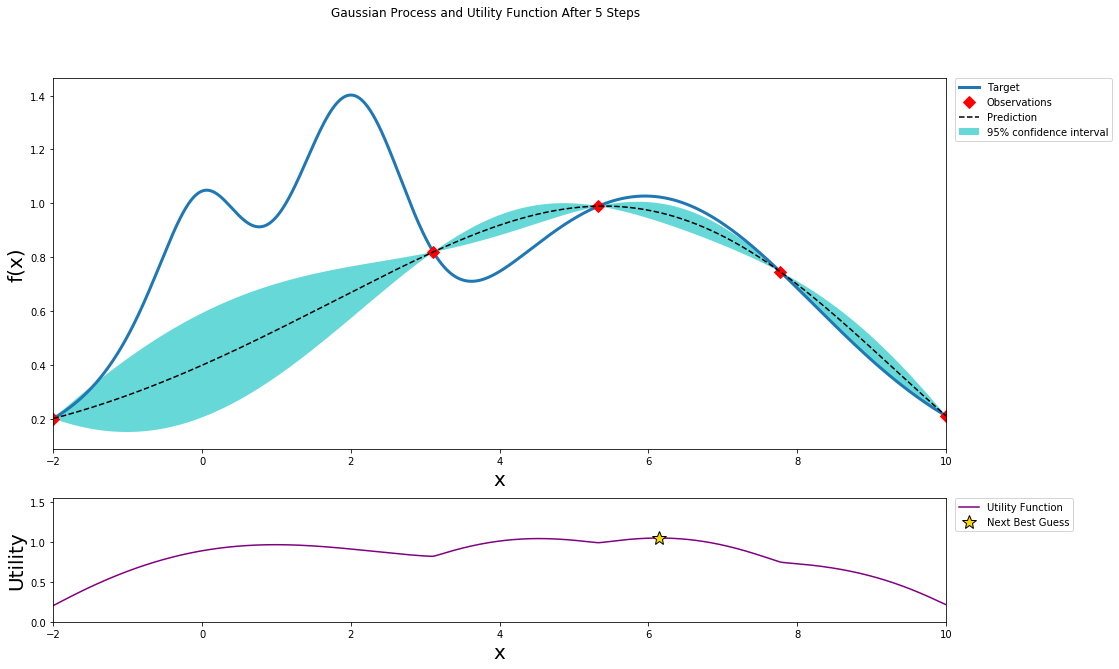

In [8]:
optimizer.maximize(init_points=0, n_iter=1, kappa=5)
utils.plot_gp(optimizer, x, y)

|   iter    |  target   |     x     |
-------------------------------------
|  6        |  1.024    |  6.141    |


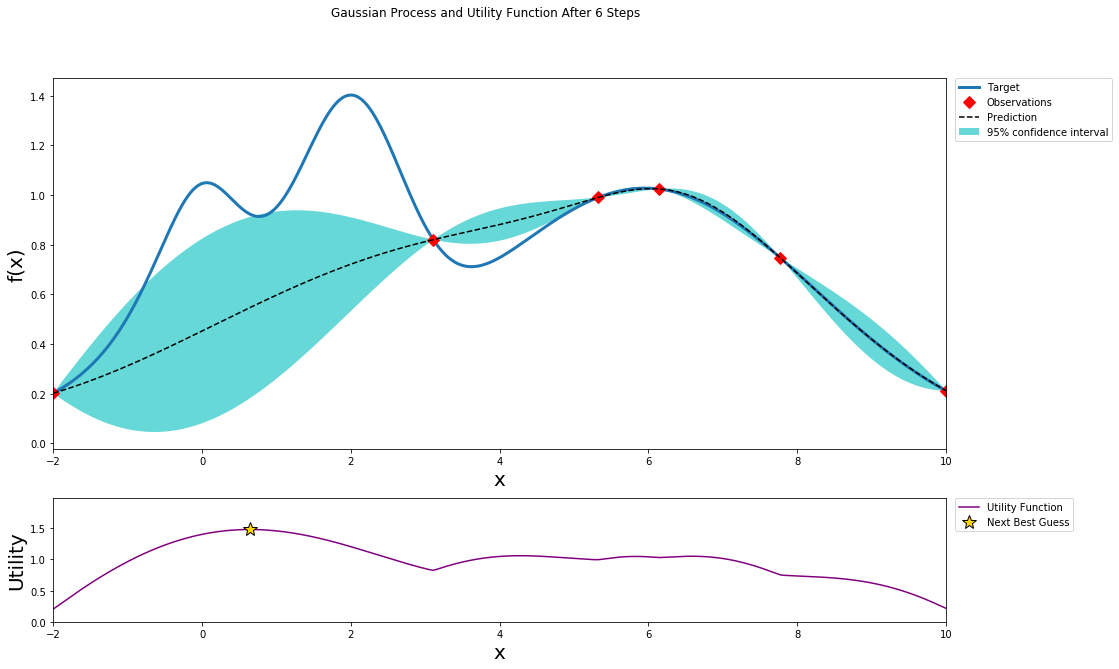

In [9]:
optimizer.maximize(init_points=0, n_iter=1, kappa=5)
utils.plot_gp(optimizer, x, y)

|   iter    |  target   |     x     |
-------------------------------------
|  7        |  0.9227   |  0.6438   |


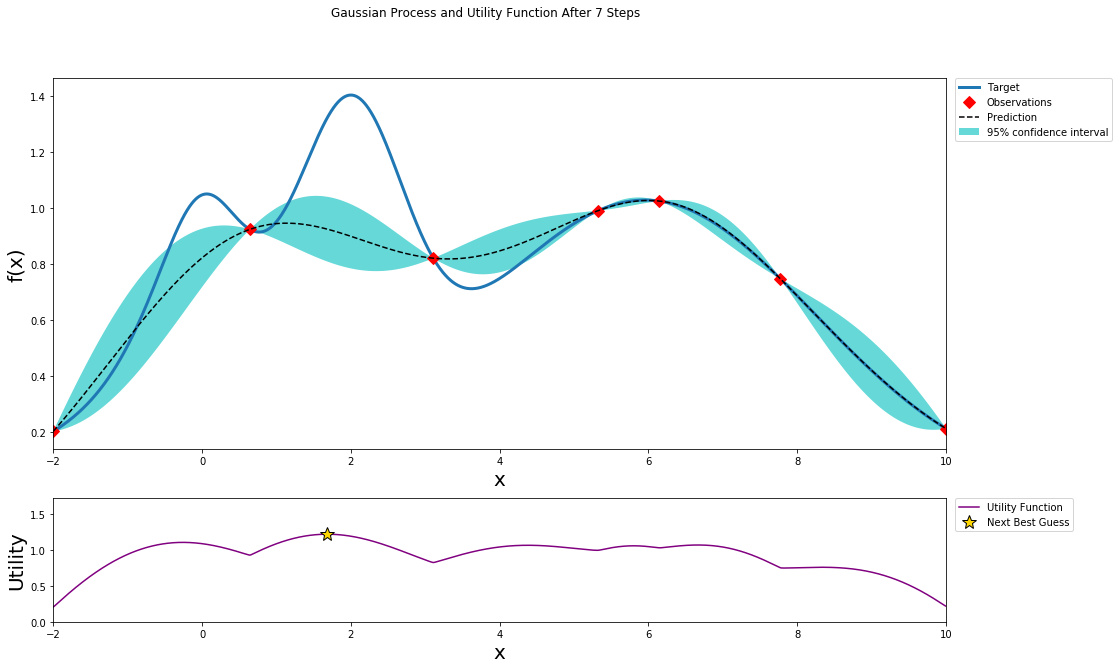

In [10]:
optimizer.maximize(init_points=0, n_iter=1, kappa=5)
utils.plot_gp(optimizer, x, y)

### Настройка гиперпараметра для метода опопрных векторов

- Формализация задачи классификации как максимизация зазора между гипеплоскостями
- Параметр $C$ регулирует важность между ошибкой на обучающей выборке и величиной зазора между опорными гиперплоскостями
- Его значение влияет на обобщающую способность
- Также есть обобщение с помощью функции ядра, которая позволяет вводить нелинейные разделяющие поверхности
- Дисперсия этой функции – ещё один параметр, который нужно настраивать!

In [13]:
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

from bayes_opt.util import Colours


def get_data():
    """Synthetic binary classification dataset."""
    data, targets = make_classification(
        n_samples=1000,
        n_features=45,
        n_informative=12,
        n_redundant=7,
        random_state=134985745,
    )
    return data, targets


def svc_cv(C, gamma, data, targets):
    """SVC cross validation.
    This function will instantiate a SVC classifier with parameters C and
    gamma. Combined with data and targets this will in turn be used to perform
    cross validation. The result of cross validation is returned.
    Our goal is to find combinations of C and gamma that maximizes the roc_auc
    metric.
    """
    estimator = SVC(C=C, gamma=gamma, random_state=2)
    cval = cross_val_score(estimator, data, targets, scoring='roc_auc', cv=4)
    return cval.mean()

In [14]:
def optimize_svc(data, targets):
    """Apply Bayesian Optimization to SVC parameters."""
    def svc_crossval(expC, expGamma):
        """Wrapper of SVC cross validation.
        Notice how we transform between regular and log scale. While this
        is not technically necessary, it greatly improves the performance
        of the optimizer.
        """
        C = 10 ** expC
        gamma = 10 ** expGamma
        return svc_cv(C=C, gamma=gamma, data=data, targets=targets)

    optimizer = BayesianOptimization(
        f=svc_crossval,
        pbounds={"expC": (-3, 2), "expGamma": (-4, -1)},
        random_state=1234,
        verbose=2
    )
    optimizer.maximize(n_iter=10)

    print("Final result:", optimizer.max)

In [16]:
data, targets = get_data()

print(Colours.yellow("--- Optimizing SVM ---"))
optimize_svc(data, targets)

--- Optimizing SVM ---
|   iter    |  target   |   expC    | expGamma  |
-------------------------------------------------
|  1        |  0.882    | -2.042    | -2.134    |
|  2        |  0.9146   | -0.8114   | -1.644    |
|  3        |  0.9402   |  0.8999   | -3.182    |
|  4        |  0.9178   | -1.618    | -1.594    |
|  5        |  0.9347   |  1.791    | -1.372    |
|  6        |  0.9007   |  2.0      | -4.0      |
|  7        |  0.9077   | -3.0      | -1.0      |
|  8        |  0.835    | -0.4243   | -4.0      |
|  9        |  0.9716   |  2.0      | -2.538    |
|  10       |  0.9729   |  1.469    | -2.332    |
|  11       |  0.9713   |  1.669    | -2.673    |
|  12       |  0.9729   |  1.788    | -2.304    |
|  13       |  0.9724   |  1.675    | -2.408    |
|  14       |  0.9722   |  1.673    | -2.434    |
|  15       |  0.9729   |  2.0      | -2.347    |
Final result: {'target': 0.9729076190476191, 'params': {'expC': 1.9995039247312532, 'expGamma': -2.347205448551982}}


## Выводы

- Байесовский подход к безградиентным методам – эффективный инструмент для нахождения глобального минимума
- Особенно хорошо работает для небольших размерностей
- Серьёзная математическая основа, возможно в следующий раз будут подробности, про то что под капотом :)